In [281]:
import numpy as np
import torch
import torch.nn as nn
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import StandardScaler
import re
import matplotlib.pyplot as plt

In [282]:
raw_train_df = pd.read_csv("./data/train.csv")
raw_test_df = pd.read_csv("./data/test.csv")

In [283]:
def text_cleaner(text):
    text = text.lower() # convert to lowercase
    text = re.sub(r'[^a-zA-Z0-9\s]', '', text) # remove punctuation and special characters
    text = re.sub(r'\s+', ' ', text) # remove extra whitespace
    text = re.sub(r'https?://\S+', '', text) # remove URLs
    text = re.sub(r"#", "", text)
    return text

In [284]:
del raw_train_df['keyword']
del raw_train_df['location']

In [285]:
# Replaces the null values in the data with an empty string
train_data = raw_train_df.where((pd.notnull(raw_train_df)),'')
test_data = raw_test_df.where((pd.notnull(raw_test_df)),'')

train_data['text'] = train_data['text'].apply(text_cleaner)
test_data['text'] = test_data['text'].apply(text_cleaner)

In [286]:
X, Y = train_data['text'], train_data['target']

In [370]:
class NeuralNet(nn.Module):
    def __init__(self, input_dims, hidden_dims_1, hidden_dims_2):
        super(NeuralNet, self).__init__()
        self.linear1 = nn.Linear(input_dims, hidden_dims_1)
        self.linear2 = nn.Linear(hidden_dims_1, hidden_dims_2)
        self.linear3 = nn.Linear(hidden_dims_2, 1)
        
    def forward(self, x):
        x = F.relu(self.linear1(x))
        x = F.relu(self.linear2(x))
        x = torch.sigmoid(self.linear3(x))
        return x

In [374]:
print(X_train_features.toarray().shape)

sc = StandardScaler()
X_train_fit = sc.fit_transform(X_train_features.toarray())
X_test_fit = sc.transform(X_test_features.toarray())

#scale
X_train_tensor = torch.from_numpy(X_train_fit.astype(np.float32))
X_test_tensor = torch.from_numpy(X_test_fit.astype(np.float32))
Y_train_tensor = torch.from_numpy(Y_train.to_numpy().astype(np.float32))
Y_test_tensor = torch.from_numpy(Y_test.to_numpy().astype(np.float32))

# # converts the tensor from 1 row to n rows with one column each
Y_train_tensor = Y_train_tensor.view(Y_train_tensor.shape[0],1)
Y_test_tensor = Y_test_tensor.view(Y_test_tensor.shape[0],1)

(6090, 18780)


In [411]:
model = NeuralNet(X_train_features.shape[1],1000,10)
learning_rate = 0.001
criterion = nn.BCELoss()
optimizer = torch.optim.Adam(model.parameters(), lr = learning_rate)

In [412]:
n_epochs = 10
all_losses = []
for epoch in range(n_epochs):
    Y_pred = model(X_train_tensor)
    
    loss = criterion(Y_pred, Y_train_tensor)
    all_losses.append(loss.item())
    loss.backward()
    optimizer.step()
    optimizer.zero_grad()
    print(f'epoch: {epoch+1}, loss = {loss.item():.4f}, learning rate = {learning_rate:2f}')

epoch: 1, loss = 0.6980, learning rate = 0.001000
epoch: 2, loss = 0.5416, learning rate = 0.001000
epoch: 3, loss = 0.3946, learning rate = 0.001000
epoch: 4, loss = 0.2825, learning rate = 0.001000
epoch: 5, loss = 0.1982, learning rate = 0.001000
epoch: 6, loss = 0.1372, learning rate = 0.001000
epoch: 7, loss = 0.0946, learning rate = 0.001000
epoch: 8, loss = 0.0657, learning rate = 0.001000
epoch: 9, loss = 0.0464, learning rate = 0.001000
epoch: 10, loss = 0.0335, learning rate = 0.001000


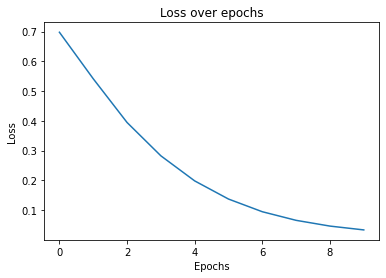

In [413]:
plt.figure()
plt.title("Loss over epochs")
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.plot(all_losses)
plt.show()

In [414]:
with torch.no_grad():
    Y_pred = model(X_test_tensor)
    Y_pred_cls = Y_pred.round()
    acc = Y_pred_cls.eq(Y_test_tensor).sum() / float(Y_test_tensor.shape[0])
    print(f'accuracy= {acc:.4f}')

accuracy= 0.7485
